In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pip install pandas
# pip install seaborn
# pip install numpy
# pip install matplotlib
# pip install sklear

In [3]:
df=pd.read_csv(r'data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [11]:
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [13]:
df.duplicated().sum()

0

In [15]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [17]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [355]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [357]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [359]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [19]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [21]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [365]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [367]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.150901,0.292400,-0.348611,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
cut,-0.150901,1.000000,-0.022439,0.185145,-0.249720,-0.480481,-0.146743,-0.147164,-0.168376,-0.090948
color,0.292400,-0.022439,1.000000,0.088333,0.035517,0.034978,0.269394,0.269509,0.270132,0.210859
clarity,-0.348611,0.185145,0.088333,1.000000,-0.060720,-0.184567,-0.375424,-0.373709,-0.376404,-0.184439
depth,0.027852,-0.249720,0.035517,-0.060720,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.480481,0.034978,-0.184567,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.146743,0.269394,-0.375424,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.147164,0.269509,-0.373709,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,-0.168376,0.270132,-0.376404,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,-0.090948,0.210859,-0.184439,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


In [369]:
df.shape

(193573, 10)

In [371]:
df = df[(df != 0).all(axis=1)]

In [373]:
df.shape

(193563, 10)

In [375]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

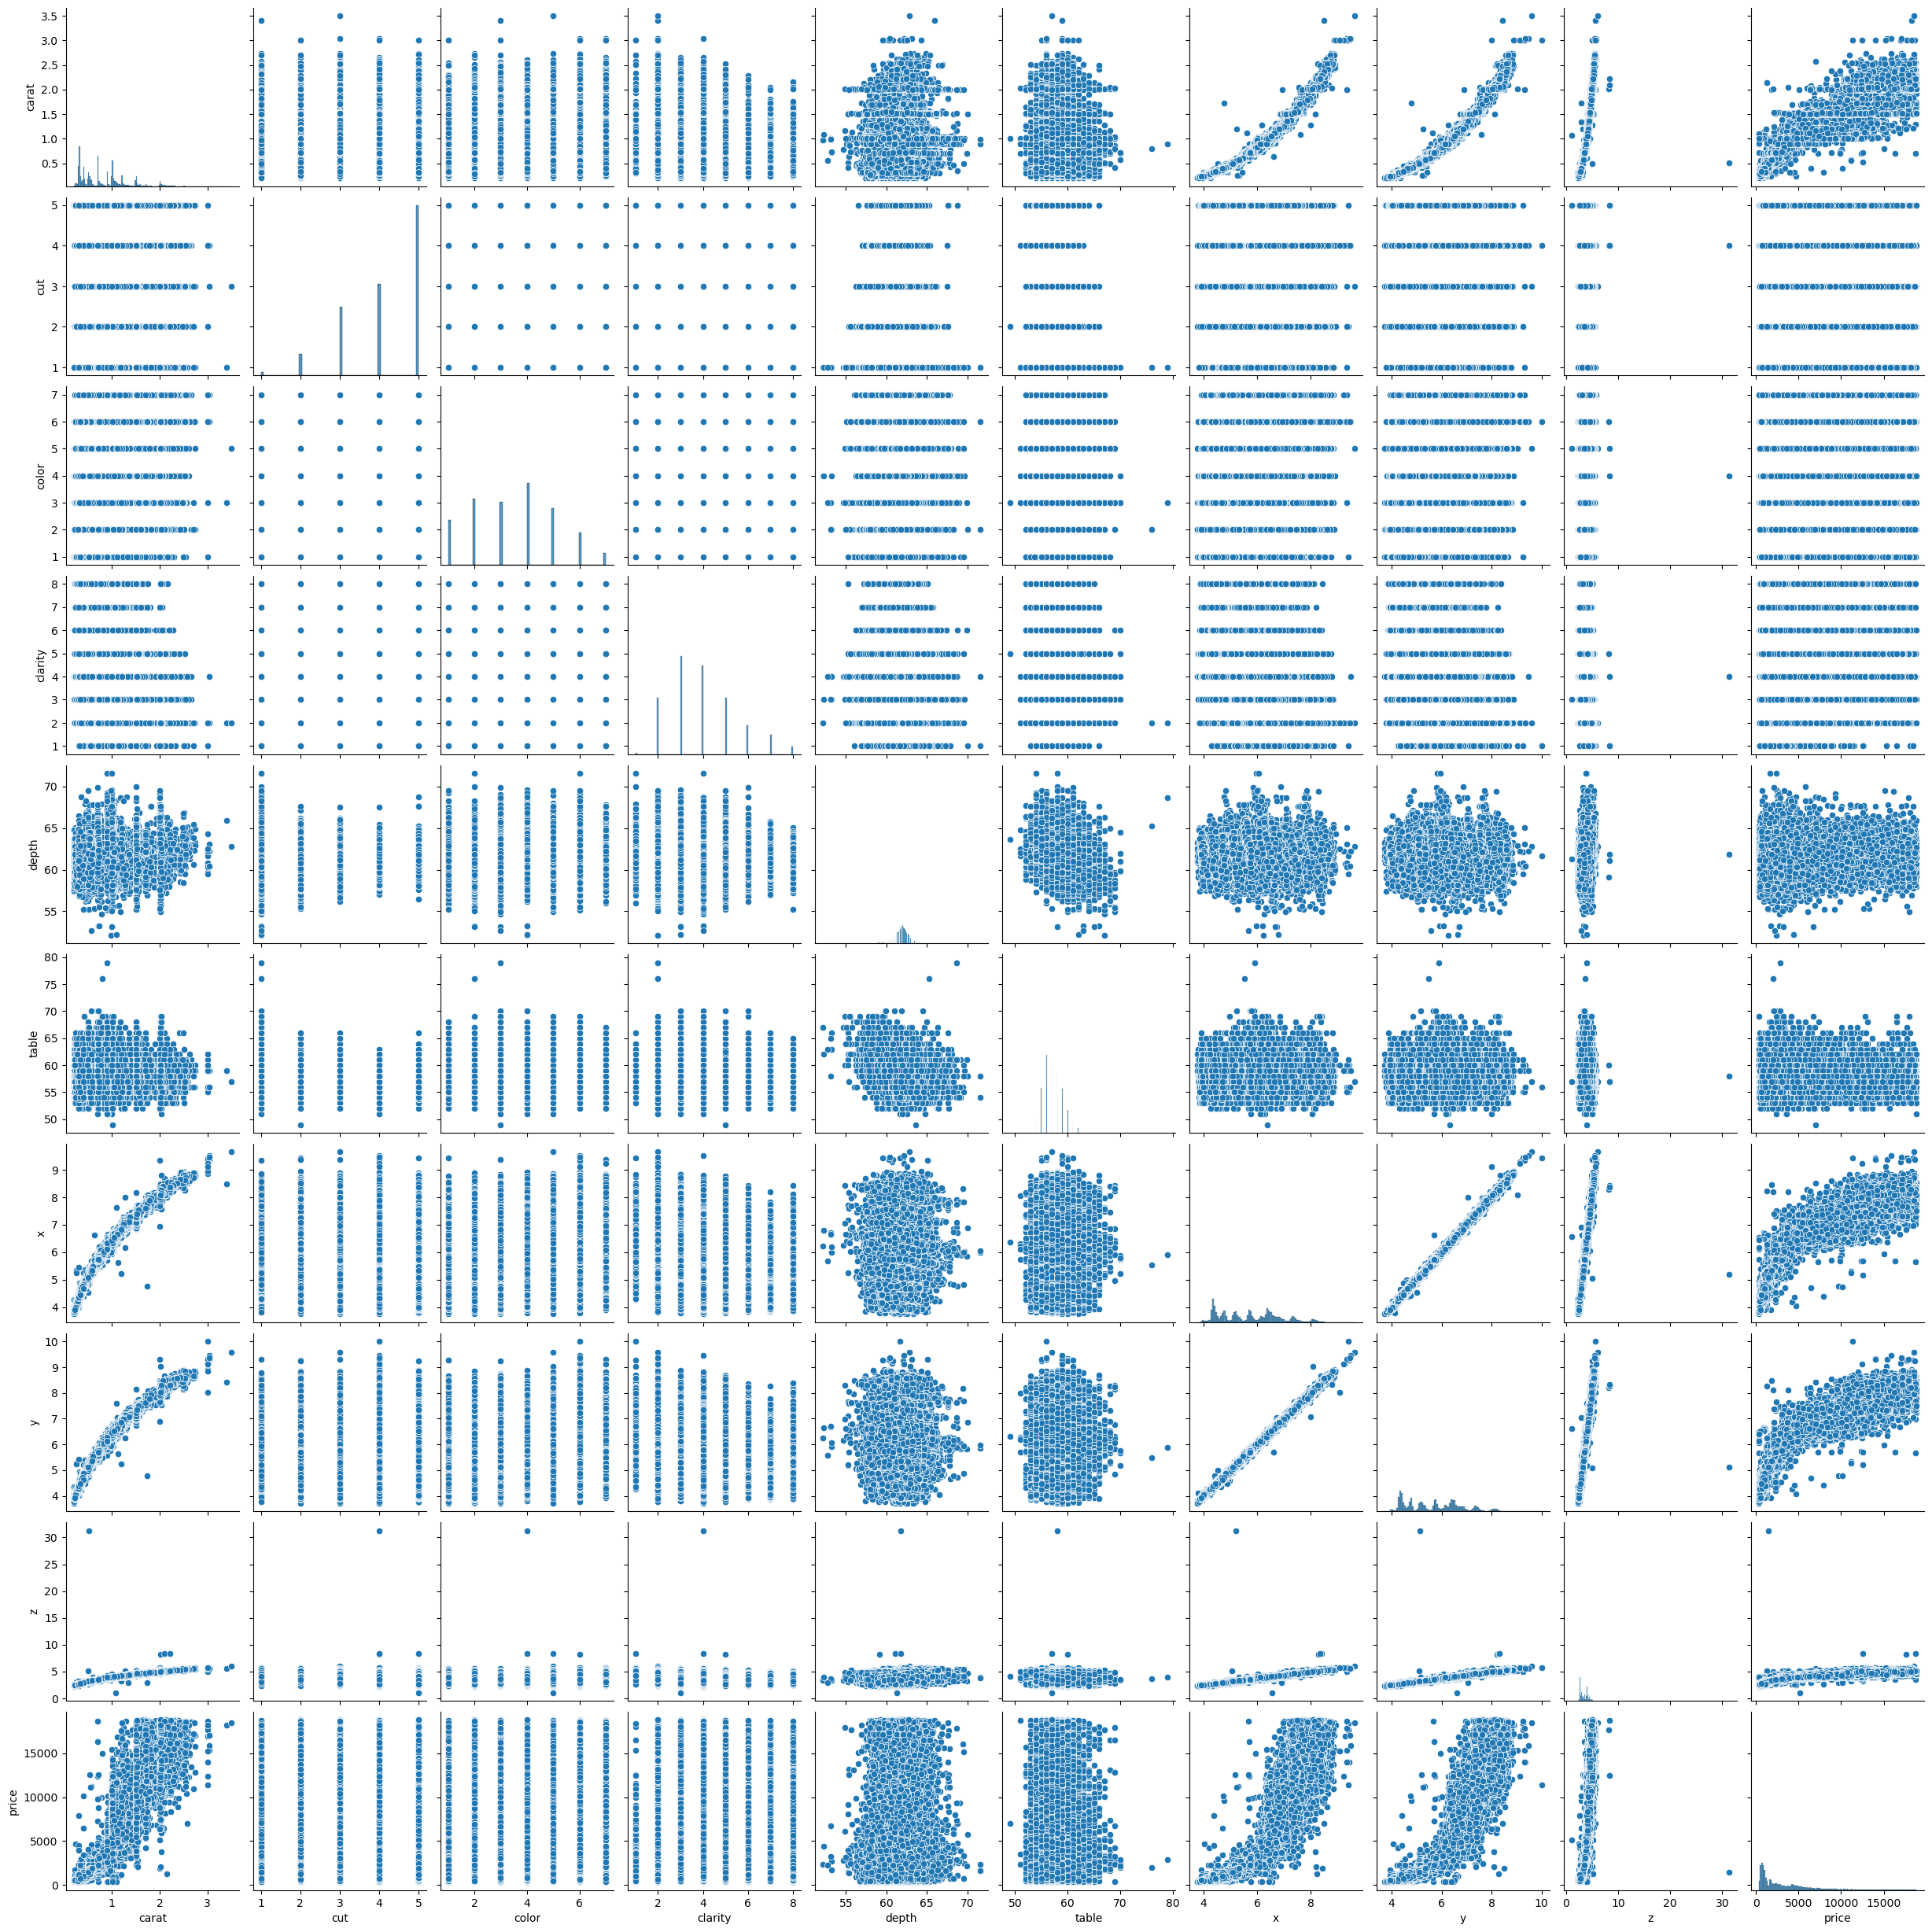

In [377]:
sns.pairplot(df)

<Axes: >

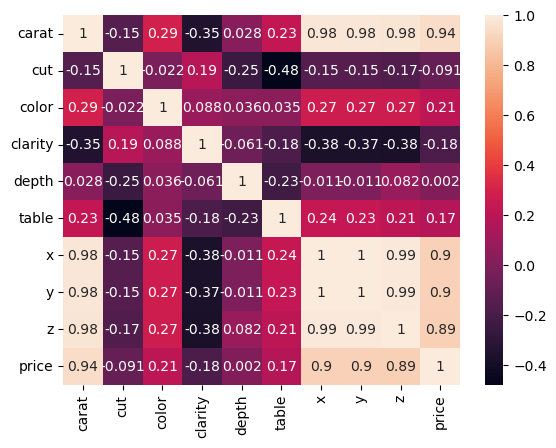

In [378]:
sns.heatmap(df.corr(),annot=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
x = df.drop('price',axis=1)
y = df['price']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=32,test_size=0.25)

In [29]:
scaler = StandardScaler()

In [31]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,mean_squared_error,mean_absolute_error

In [41]:
y_pred = model.predict(x_test)

In [43]:
print("R^2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: 0.9362548552375117
MAE: 675.8749841094854
RMSE: 1014.5927684685918


In [45]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [47]:
carat = float(input("Enter carat: "))
cut = int(input("Enter cut (1: Fair, 2: Good, 3: Very Good, 4: Premium, 5: Ideal): "))
color = int(input("Enter color (1: D, 2: E, 3: F, 4: G, 5: H, 6: I, 7: J): "))
clarity = int(input("Enter clarity (1: I1, 2: SI2, 3: SI1, 4: VS2, 5: VS1, 6: VVS2, 7: VVS1, 8: IF): "))
depth = float(input("Enter depth: "))
table = float(input("Enter table: "))
x = float(input("Enter x: "))
y = float(input("Enter y: "))
z = float(input("Enter z: "))

user_input = pd.DataFrame({
    'carat': [carat],
    'cut': [cut],
    'color': [color],
    'clarity': [clarity],
    'depth': [depth],
    'table': [table],
    'x': [x],
    'y': [y],
    'z': [z]
})

user_input = scaler.transform(user_input)

predicted_price = model.predict(user_input)
price = int(predicted_price[0])
print(f"Predicted price: {price}")

KeyboardInterrupt: Interrupted by user

In [407]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [409]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681
193572,0.71,2,2,2,60.8,64.0,5.73,5.71,3.48,2258


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

gemstone_data=pd.read_csv(r'data/gemstone.csv')

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=32),
    'Random Forest': RandomForestRegressor(random_state=32),
    'Gradient Boosting': GradientBoostingRegressor(random_state=32),
    'XGBoost': XGBRegressor(random_state=32)
}

# Prepare data
X = gemstone_data.drop(columns=["id", "price"], axis=1)
y = gemstone_data['price']

# Map categorical features to numerical
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
clarity_map = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}
color_map = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7}

X['cut'] = X['cut'].map(cut_map)
X['clarity'] = X['clarity'].map(clarity_map)
X['color'] = X['color'].map(color_map)

# Remove rows with zero values
X = X[(X != 0).all(axis=1)]
y = y[X.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print("Trained: ",name)


def evaluate_models(models, X, y):
    results = {}
    for name, model in models.items():
        print("Processing: ",name)
        scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        results[name] = scores.mean()
    return results

model_results = evaluate_models(models, X_scaled, y)
print(model_results)


Processing:  Linear Regression
Processing:  Decision Tree
Processing:  Random Forest
Processing:  Gradient Boosting
Processing:  XGBoost
{'Linear Regression': 0.9355417203725356, 'Decision Tree': 0.9569872019578229, 'Random Forest': 0.9772494739924665, 'Gradient Boosting': 0.9765454123371475, 'XGBoost': 0.9789536268461883}


In [174]:
new_sample = gemstone_data.sample(n=1).drop(columns=["id"])
new_data = new_sample.drop(columns=["price"])
actual_price = new_sample["price"].values[0]

# Map categorical features to numerical for new data
new_data['cut'] = new_data['cut'].map(cut_map)
new_data['clarity'] = new_data['clarity'].map(clarity_map)
new_data['color'] = new_data['color'].map(color_map)

# Scale the new data using the same scaler as training data
new_data_scaled = scaler.transform(new_data)

# Predict and evaluate for each model
for name, model in trained_models.items():
    predicted_price = model.predict(new_data_scaled)
    print(f"Model: {name}")
    print("Predicted Price:", predicted_price[0])
    print("Actual Price:", actual_price)
    print("\n")

Model: Linear Regression
Predicted Price: 4875.45599429797
Actual Price: 4585


Model: Decision Tree
Predicted Price: 5068.0
Actual Price: 4585


Model: Random Forest
Predicted Price: 4785.4
Actual Price: 4585


Model: Gradient Boosting
Predicted Price: 4712.660284228186
Actual Price: 4585


Model: XGBoost
Predicted Price: 4849.995
Actual Price: 4585




In [192]:
import time,os
from IPython.display import clear_output

i=0
while i<10:
    new_sample = gemstone_data.sample(n=1).drop(columns=["id"])
    new_data = new_sample.drop(columns=["price"])
    actual_price = new_sample["price"].values[0]
    
    # Map categorical features to numerical for new data
    new_data['cut'] = new_data['cut'].map(cut_map)
    new_data['clarity'] = new_data['clarity'].map(clarity_map)
    new_data['color'] = new_data['color'].map(color_map)
    
    # Scale the new data using the same scaler as training data
    new_data_scaled = scaler.transform(new_data)
    
    # Predict and evaluate for each model
    for name, model in trained_models.items():
        predicted_price = model.predict(new_data_scaled)
        print(f"Model: {name}")
        print("Predicted Price:", predicted_price[0])
        print("Actual Price:", actual_price)
        print("\n")
    time.sleep(3)
    clear_output(wait=True)
    i+=1

Model: Linear Regression
Predicted Price: 6631.724045986993
Actual Price: 5995


Model: Decision Tree
Predicted Price: 5995.0
Actual Price: 5995


Model: Random Forest
Predicted Price: 5777.8
Actual Price: 5995


Model: Gradient Boosting
Predicted Price: 6262.729057385744
Actual Price: 5995


Model: XGBoost
Predicted Price: 5604.199
Actual Price: 5995


